<a href="https://colab.research.google.com/github/Rubina-Fathima/-EDA-Airbnb-NYC-2019-/blob/main/airbnb_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:
import pandas as pd
import numpy as np
from numpy import mean
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path='/content/drive/MyDrive/AirBnB Bookings Analysis/Airbnb NYC 2019.csv'
airbnb_df1=pd.read_csv(path)
airbnb_df1.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
airbnb_df1.describe()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
#Datatypes of each column.
airbnb_df1.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [6]:
#Count of rows and columns in the dataset.
airbnb_df1.shape

(48895, 16)

There are 48895 records and 16 columns.

# **Here i am checking the Dataframe with respect to reviews column.

In [7]:
#Comparing neighbourhood group with  count of number of reviews column.
airbnb_reviews=airbnb_df1.groupby('neighbourhood_group')['number_of_reviews'].count()
airbnb_reviews

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: number_of_reviews, dtype: int64

In [8]:
#Comparing neighbourhood group with minimum reviews given by the groups.
airbnb1_reviews1=airbnb_df1.groupby('neighbourhood_group')['number_of_reviews'].min()
airbnb1_reviews1

neighbourhood_group
Bronx            0
Brooklyn         0
Manhattan        0
Queens           0
Staten Island    0
Name: number_of_reviews, dtype: int64

In [9]:
#Here i am trying to get records with minimum nights stayed and number of reviews given.
airbnb_reviews1=airbnb_df1.groupby('minimum_nights')['number_of_reviews'].count()
airbnb_reviews1

minimum_nights
1       12720
2       11696
3        7999
4        3303
5        3034
        ...  
480         1
500         5
999         3
1000        1
1250        1
Name: number_of_reviews, Length: 109, dtype: int64

As we can see from above code that reviews from customers who have booked for minimum nights are higher compared to customers who booked hotel for more than 480 days to stay.
Hence the customer with maximum stay should be of top priority for business.
Get to know the concerns and trouble faced by such customers and take  good reviews from them.


In [10]:

#I am trying to fetch records who appeared only once in the reviews column
output_one_review_df = airbnb_df1.loc[(airbnb_df1['number_of_reviews']==1)]
output_one_review_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
97,21644,"Upper Manhattan, New York",82685,Elliott,Manhattan,Harlem,40.82803,-73.94731,Private room,89,1,1,2018-10-09,0.11,1,365
143,32363,Fully Furnished Basement Apartment,140025,Fredah,Queens,Flushing,40.74028,-73.83168,Private room,140,2,1,2011-09-19,0.01,1,1
229,59121,"Nice, clean, safe, convenient 3BR",204539,Mark,Queens,Ridgewood,40.70411,-73.89934,Entire home/apt,140,14,1,2012-09-17,0.01,5,365
237,60673,Private Room/bath Luxurious Harlem,249372,Cynthia,Manhattan,Harlem,40.81583,-73.94707,Private room,175,2,1,2018-10-07,0.11,1,365
272,64707,Amazing Sunny & Breezy Home In the Heart of NYC,7310,Tilly,Manhattan,Little Italy,40.71702,-73.99811,Entire home/apt,90,14,1,2019-01-02,0.16,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48740,36413632,Spacious 2BR in Beautiful Brooklyn Heights,6608220,Matt,Brooklyn,Brooklyn Heights,40.69827,-73.99649,Entire home/apt,550,3,1,2019-07-07,1.00,1,230
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147
48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87


Here i am assuming that value '0' in the reviews column as no recorded reviews.
Hence i took the reviews=1 as succesfull recordings of reviews column.
I tried to draw host_id's of hosts who gave less reviews.

len() gives the total number of customers who recorded '1' as review or we can say unhappy customers.


In [11]:
#Comparing the count of room types given by customers who gave review only once.
output_one_review_df['room_type'].value_counts()

Private room       2554
Entire home/apt    2553
Shared room         137
Name: room_type, dtype: int64

The above code says that the room type which got low reviews was 'Shared Room'.
Private room and Entire home has equal number of reviews.


In [12]:
#I am trying to compare room type and price to find out the reason behing single review.
output_one_review_df.groupby('room_type')['price'].mean()

room_type
Entire home/apt    215.746181
Private room        86.903289
Shared room         78.978102
Name: price, dtype: float64

Average cost of room based on room type is same to all customers.


In [13]:
# Trying to relate single reviews given by hostname and  count of minimum_nights. 
output_one_review_df.groupby('host_name')['minimum_nights'].count()

host_name
(Email hidden by Airbnb)    1
A                           1
A-B                         1
AFI Apartments              4
Aamir                       1
                           ..
思铨                          1
睿                           1
诗月                          1
빈나                          1
소정                          1
Name: minimum_nights, Length: 2461, dtype: int64

This gives a list of hostname and count of minimum nights spend by them.
Hostnames who gave single review stayed for one night /or booked for single day according to airbnb dataset. 

In [14]:
apartment = airbnb_df1[airbnb_df1['room_type']=='Entire home/apt']
list_of_apartment = apartment.groupby(['host_name','price','neighbourhood_group','neighbourhood','last_review']).size().reset_index(name='apartment_count').sort_values(by=['apartment_count'],ascending=False)
list_of_apartment.head(10)

,host_name,price,neighbourhood_group,neighbourhood,last_review,apartment_count
17872,Sonder (NYC),229,Manhattan,Financial District,2019-06-23,4
7456,Henry,2000,Manhattan,Upper West Side,2016-01-28,2
1773,Anne,180,Manhattan,Chelsea,2019-06-25,2
12231,Malika,100,Brooklyn,Crown Heights,2019-05-12,2
15963,Red Awning,675,Manhattan,Midtown,2019-05-20,2
15971,Red Awning,699,Manhattan,Midtown,2019-05-19,2
17890,Sonder (NYC),235,Manhattan,Financial District,2019-06-24,2
15960,Red Awning,675,Manhattan,Midtown,2019-02-17,2
15973,Red Awning,699,Manhattan,Midtown,2019-05-31,2
20155,Zabi,199,Queens,Long Island City,2019-06-22,2


From the above dataset i am trying to draw a pattern with last_review and price of entire home/apt.
Here 2019-06-10 Manhattan neighbourhood Financial District price is 230
     2019-06-11	Manhattan neighbourhood Financial District price is 214
     2019-06-23 Manhattan neighbourhood Financial District price is 229

  Data shows most recent price of entire home has dropped from 230 to 214 and kept to hike by 229 in the same month of the year.

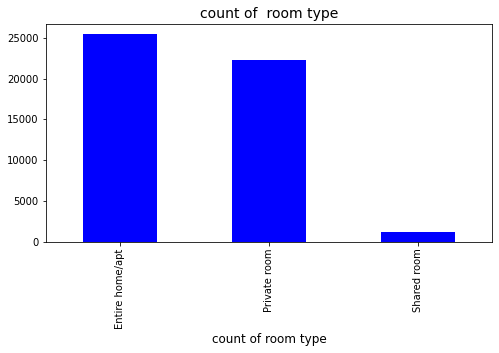

In [15]:
count_of_rooms=airbnb_df1['room_type'].value_counts()
count_of_rooms.plot.bar(figsize=(8,4), color ='b', width= 0.5)
plt.title('count of  room type', fontsize=14)
plt.xlabel('count of room type', fontsize = 12)
plt.show()

Above graph shows bookings of entire home and private room are high compared to shared room. Mean Price of Private room is 86 and Mean price  of Shared room 78.
As there is no significant variance in the price alloted to Private room and shared room, listings of Private room are higher compared to Shared room.

In [16]:
Less_review_host = airbnb_df1.loc[(airbnb_df1['number_of_reviews'].min())]
Less_review_host

id                                                              2539
name                              Clean & quiet apt home by the park
host_id                                                         2787
host_name                                                       John
neighbourhood_group                                         Brooklyn
neighbourhood                                             Kensington
latitude                                                    40.64749
longitude                                                  -73.97237
room_type                                               Private room
price                                                            149
minimum_nights                                                     1
number_of_reviews                                                  9
last_review                                               2018-10-19
reviews_per_month                                               0.21
calculated_host_listings_count    

Above code fetches the details of the customer named "John" who has awarded less reviews on 2018-10-19.
Feedback from John will help to focus on areas where hotel is failing to improve the customer satisfaction.

In [17]:
#airbnb_df
#airbnb_price.plot('neighbourhood_group','price',kind='bar')

#
#airbnb_host=airbnb_df.groupby('host_name')['id'].count().reset_index()[:20]
#airbnb_host.plot('host_name','id',kind='bar')

#


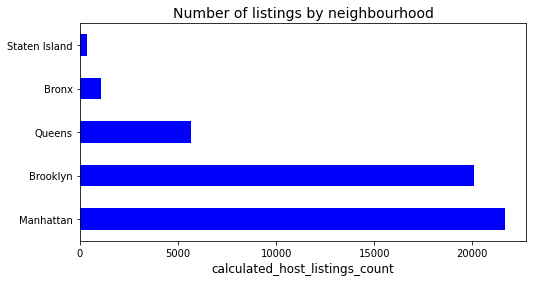

In [18]:
#Seeing which neighborhood has the highest number of listings
neighbourhood_group_count = airbnb_df1['neighbourhood_group'].value_counts()

neighbourhood_group_count.plot.barh(figsize=(8,4), color ='b', width= 0.5)
plt.title('Number of listings by neighbourhood', fontsize=14)
plt.xlabel('calculated_host_listings_count', fontsize = 12)
plt.show()

The above figure shows that Manhattan has the highest listings of host calculated as per the dataset.


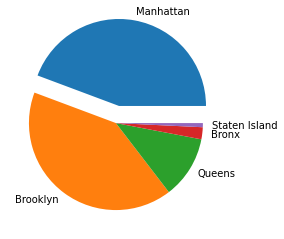

In [19]:
#Pie chart to visialize neighbourhood groups in the listings.
mylabels = ["Manhattan", "Brooklyn", "Queens", "Bronx","Staten Island"]
length_list = [0.2, 0, 0, 0,0 ]
plt.pie(neighbourhood_group_count,labels=mylabels,explode=length_list)
plt.show()


Although  Manhattan is listed as the busiest place with airbnb bookings ,here scatterplot shows most of the hotels are situated nearby,Thus it concludes that Manhattan got places of tourist attractions. 

# Comparing the availability_365 column.

In [20]:
# Drawing value counts of availability column and grouping them with neighbourhood group
airbnb_df1.groupby('neighbourhood_group')['availability_365'].value_counts()

neighbourhood_group  availability_365
Bronx                0                   177
                     365                  54
                     364                  22
                     89                   20
                     363                  17
                                        ... 
Staten Island        346                   1
                     347                   1
                     348                   1
                     357                   1
                     361                   1
Name: availability_365, Length: 1577, dtype: int64

Above list show Neighbourhood group Bronx has listed with less availability.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


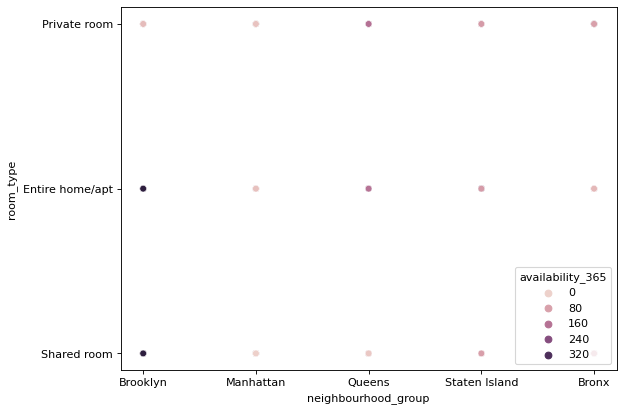

In [21]:

#Using Scatterplot to check if any relation comes out of room type and availability column.
plt.figure(figsize=(8,6), dpi = 80)
sns.scatterplot(airbnb_df1.neighbourhood_group,airbnb_df1.room_type,hue=airbnb_df1.availability_365)
plt.ioff()

Above Scatterplot shows Neighbourhood group Brooklyn has high availability of Shared room and Entire home/apt.


In [22]:
#Comparing the price variation with respect to availability column.
airbnb_df1.groupby(['availability_365'])['price'].mean().tail(10)

availability_365
356    138.000000
357    177.536842
358    212.594444
359    180.925926
360    154.970588
361    157.108108
362    201.096386
363    200.644351
364    260.372709
365    250.769884
Name: price, dtype: float64

In [23]:
airbnb_df1.groupby(['availability_365'])['price'].mean().head(10)

availability_365
0    136.032111
1    129.509804
2    145.944444
3    136.486928
4    135.759657
5    134.179412
6    123.612245
7    135.123288
8    131.047210
9    146.445596
Name: price, dtype: float64

Above observations show as the availability increases price also increases.
availability and price of rooms is directly proportional.

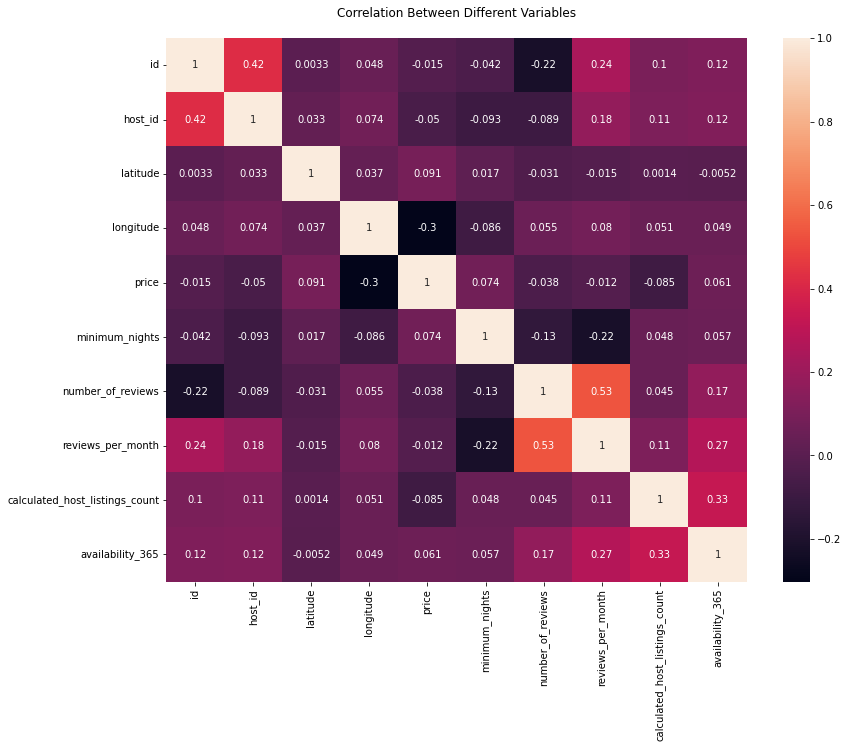

In [24]:
corr = airbnb_df1.corr(method='kendall')
plt.figure(figsize=(13,10))
plt.title("Correlation Between Different Variables\n")
sns.heatmap(corr, annot=True)
plt.show()

Heat map gives the correlation between variable in the dataframe.
column number_of_reviews has the correlation.

In [25]:
#Date which was mostly reviewed.
airbnb_df1['last_review'].mode()

0    2019-06-23
dtype: object

In [26]:
airbnb_df1.reviews_per_month.isnull().sum()

10052

In [27]:

#replacing all NaN values in 'reviews_per_month' with 0
airbnb_df1.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
airbnb_df1.reviews_per_month.isnull().sum()

0

Reviews_per_month column consists of null values, replace them with '0' for our convenience.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


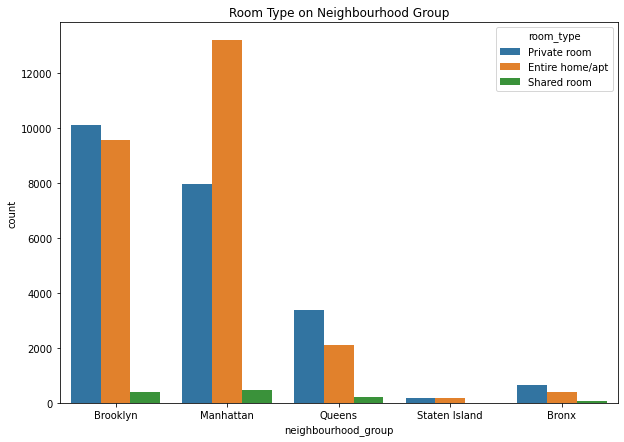

In [28]:
plt.figure(figsize=(10,7))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(airbnb_df1.neighbourhood_group,hue=airbnb_df1.room_type)
plt.show()

Above figure clearly shows the roomtype counts with respect to neighbourhood_group column.
Manhattan has highest entire room/apt bookings.


In [29]:
single_night_booking_df = airbnb_df1[airbnb_df1['minimum_nights']==1 ]
single_night_booking_df  = single_night_booking_df .groupby(['room_type','neighbourhood_group'])['price'].mean().sort_values(ascending=True)
pd.DataFrame(single_night_booking_df ).sort_values(by='room_type')

price
room_type       neighbourhood_group            
Entire home/apt Queens               139.036260
                Bronx                141.541176
                Brooklyn             202.895245
                Staten Island        266.205128
                Manhattan            291.784595
Private room    Bronx                 69.025862
                Staten Island         71.394366
                Queens                72.454958
                Brooklyn              81.713284
                Manhattan            121.434183
Shared room     Staten Island         21.000000
                Bronx                 46.711111
                Brooklyn              60.921212
                Queens                68.459459
                Manhattan             88.462898

Text(0.5, 0, 'Neighbourhood Group')

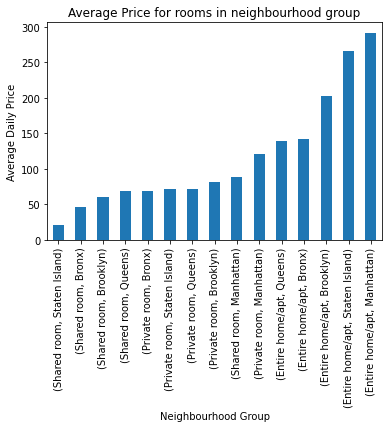

In [30]:
single_night_booking_df .plot(kind='bar')
plt.title('Average Price for rooms in neighbourhood group')
plt.ylabel('Average Daily Price')
plt.xlabel('Neighbourhood Group')



The above list gives per day charges of airbnb bookings around 

neighbourhood_group.

Expensive neighbourhood in Airbnb listing


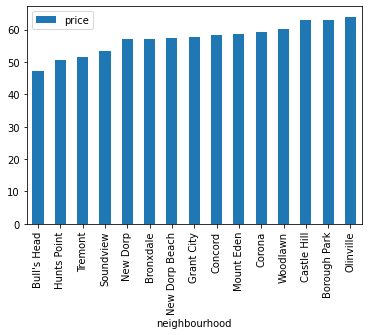

,price
neighbourhood,
Bull's Head,47.333333
Hunts Point,50.500000
Tremont,51.545455
Soundview,53.466667
New Dorp,57.000000
Bronxdale,57.105263
New Dorp Beach,57.400000
Grant City,57.666667
Concord,58.192308


In [33]:
print('Expensive neighbourhood in Airbnb listing')
high_cost_places = airbnb_df1.groupby("neighbourhood")[["neighbourhood", "price"]].agg("mean").sort_values(by="price",ascending=True).head(15)

high_cost_places.plot(kind='bar')
plt.show()
pd.DataFrame(high_cost_places)

Fort Wadsworth is the most expensive among neighbourhood with price 800.
Similarly we can find the least expensive neighbourhood by just using a tail() method.

Low price  Airbnb listing 


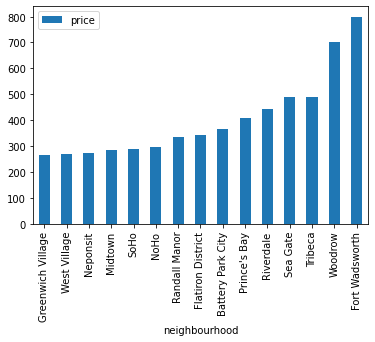

In [34]:
print('Low price  Airbnb listing ')
low_cost_places = airbnb_df1.groupby("neighbourhood")[["neighbourhood", "price"]].agg("mean").sort_values(by="price",ascending=True).tail(15)

low_cost_places.plot(kind='bar')
plt.show()


In [36]:
#Dataframe consisting all records with lowest expenses.
pd.DataFrame(low_cost_places)

,price
neighbourhood,
Greenwich Village,263.405612
West Village,267.682292
Neponsit,274.666667
Midtown,282.719094
SoHo,287.103352
NoHo,295.717949
Randall Manor,336.000000
Flatiron District,341.925000
Battery Park City,367.557143


The above list gives least expensive airbnb neighbourhood, Bull's Head is recorded as least expensive with price 47.

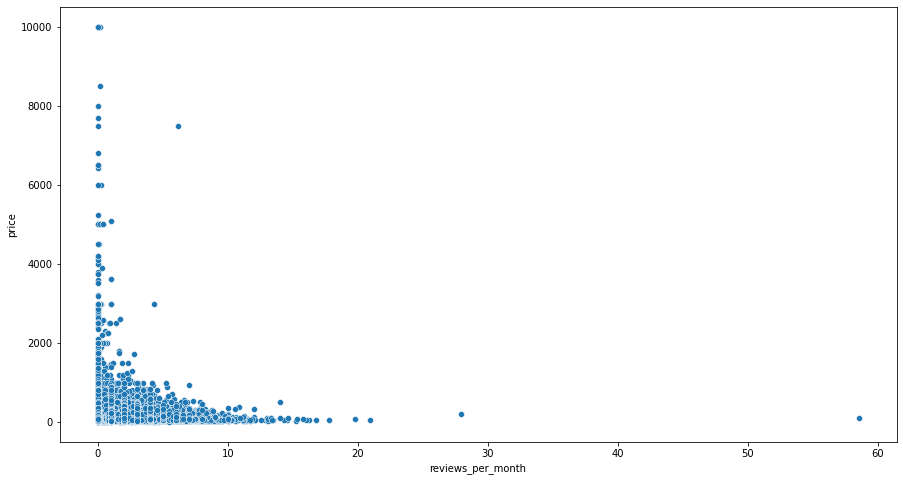

In [37]:
#Visualization of price and reviews column.
plt.figure(figsize=(15,8))
sns.scatterplot(y=airbnb_df1['price'],x=airbnb_df1['reviews_per_month'])

Above scatterplot shows most of the reviews per month were recorded below 10 with bookings which are less expensive under price 2000.

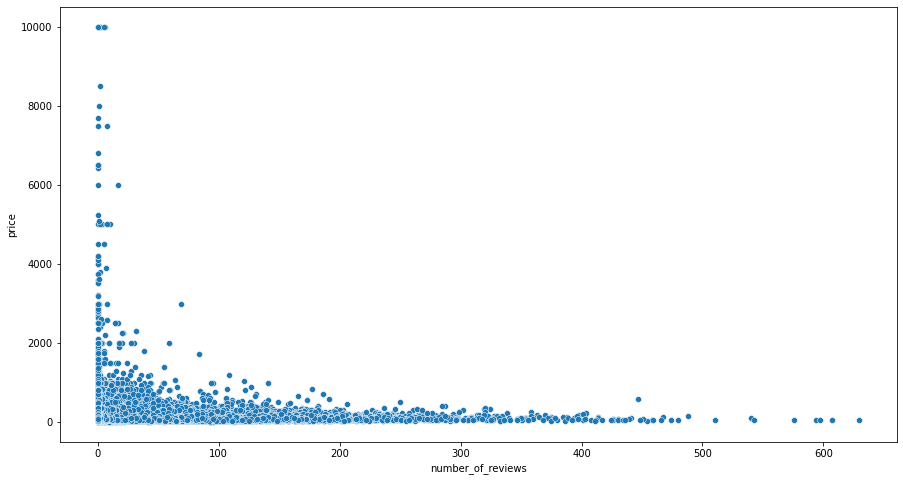

In [38]:
plt.figure(figsize=(15,8))
sns.scatterplot(y=airbnb_df1['price'],x=airbnb_df1['number_of_reviews'])

Here scatterplot shows the number of reviews given by customers is less when price is between 8000 and 1000.